# Working with Annual Averages in Cal-Adapt API

In [1]:
%matplotlib inline

import requests 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
headers = {'ContentType': 'json'}

api = 'http://api.cal-adapt.org/api'

In [2]:
resource = 'counties'
geometry_uri = ''

# Point location in geojson format
coord = (-121.4687, 38.5938)
point = '{"type":"Point","coordinates":[%s,%s]}' % coord

# Params
params = {'intersects': point, 'srs': 4326, 'precision': 4}

# Construct url
url = '%s/%s/' % (api, resource)

# Get county geometry
response = requests.get(url, params, headers=headers)
print(response.url)
print()
if response.ok:
    data = response.json()
    geometry_uri = '/api/%s/%s/' % (resource, data['features'][0]['id'])
    print('Uniform Resource Identifier for county: %s' % geometry_uri)

http://api.cal-adapt.org/api/counties/?intersects={"type":"Point","coordinates":[-121.4687,38.5938]}&srs=4326&precision=4

Uniform Resource Identifier for county:/api/counties/34/


### Get a list of annual timeseries from Cal-Adapt API for maximum temperature for HadGEM2-ES model

In [3]:
temp_url = 'http://api.cal-adapt.org/api/series/tasmax_year_HadGEM2-ES_rcp85/'
pr_url = 'http://api.cal-adapt.org/api/series/pr_year_HadGEM2-ES_rcp85/'

### Setup parameters for requesting data

In [4]:
# Alternatively get complete timeseries
period = 'rasters'

In [5]:
# Pagesize - number of records returned, default is 10
pagesize = 100

In [6]:
stat = 'mean'

In [7]:
params = {'pagesize': pagesize, 'ref': geometry_uri, 'stat': stat}

### Get temperature data

In [8]:
temp_data = None

response = requests.get(temp_url + period, params, headers=headers)
if response.ok:
    json = response.json()
    temp_data = json['results']
    print(temp_data[0])

{'id': 12320, 'tileurl': 'http://api.cal-adapt.org/tiles/tasmax_year_HadGEM2-ES_rcp85_2006/{z}/{x}/{y}.png', 'url': 'http://api.cal-adapt.org/api/rstores/tasmax_year_HadGEM2-ES_rcp85_2006/', 'image': 297.00596005154637, 'width': 179, 'height': 195, 'geom': {'type': 'Polygon', 'coordinates': [[[-124.5625, 31.5625], [-113.375, 31.5625], [-113.375, 43.75], [-124.5625, 43.75], [-124.5625, 31.5625]]]}, 'event': '2006-01-01', 'srs': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]', 'minval': 277.29461669921875, 'maxval': 306.6802673339844, 'nodata': 1.0000000150474662e+30, 'xpixsize': 0.0625, 'ypixsize': -0.0625, 'name': 'yearly average maximum temperature HadGEM2-ES RCP 8.5', 'slug': 'tasmax_year_HadGEM2-ES_rcp85_2006', 'units': 'K'}


### Create pandas dataframe from data.

In [9]:
dfT = pd.DataFrame(temp_data)
# Change format of `event` field from string to datetime
dfT['event'] = pd.to_datetime(dfT['event'], format='%Y-%m-%d')
# Set event field as index
dfT = dfT.set_index(['event'])
dfT.head()

,geom,height,id,image,maxval,minval,name,nodata,slug,srs,tileurl,units,url,width,xpixsize,ypixsize
event,,,,,,,,,,,,,,,,
2006-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12320,297.005960,306.680267,277.294617,yearly average maximum temperature HadGEM2-ES ...,1.000000e+30,tasmax_year_HadGEM2-ES_rcp85_2006,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Had...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2007-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12321,298.740154,306.515289,279.461761,yearly average maximum temperature HadGEM2-ES ...,1.000000e+30,tasmax_year_HadGEM2-ES_rcp85_2007,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Had...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2008-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12322,297.324380,306.392303,277.135956,yearly average maximum temperature HadGEM2-ES ...,1.000000e+30,tasmax_year_HadGEM2-ES_rcp85_2008,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Had...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2009-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12323,297.329333,306.001038,277.822418,yearly average maximum temperature HadGEM2-ES ...,1.000000e+30,tasmax_year_HadGEM2-ES_rcp85_2009,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Had...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2010-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12324,296.602187,305.385651,277.153900,yearly average maximum temperature HadGEM2-ES ...,1.000000e+30,tasmax_year_HadGEM2-ES_rcp85_2010,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Had...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625


### Get precipitation data

In [10]:
pr_data = None

response = requests.get(pr_url + period, params, headers=headers)
if response.ok:
    json = response.json()
    pr_data = json['results']
    print(pr_data[0])

{'id': 12132, 'tileurl': 'http://api.cal-adapt.org/tiles/pr_year_HadGEM2-ES_rcp85_2006/{z}/{x}/{y}.png', 'url': 'http://api.cal-adapt.org/api/rstores/pr_year_HadGEM2-ES_rcp85_2006/', 'image': 6.969961140919285e-06, 'width': 179, 'height': 195, 'geom': {'type': 'Polygon', 'coordinates': [[[-124.5625, 31.5625], [-113.375, 31.5625], [-113.375, 43.75], [-124.5625, 43.75], [-124.5625, 31.5625]]]}, 'event': '2006-01-01', 'srs': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]', 'minval': 4.3958837636637327e-07, 'maxval': 0.00010573217878118157, 'nodata': 1.0000000150474662e+30, 'xpixsize': 0.0625, 'ypixsize': -0.0625, 'name': 'yearly average precipitation HadGEM2-ES RCP 8.5', 'slug': 'pr_year_HadGEM2-ES_rcp85_2006', 'units': 'kg/m2/s'}


### Convert `image` field type from list to a numpy array of floats

In [11]:
dfP = pd.DataFrame(pr_data)
# Change format of `event` field from string to datetime
dfP['event'] = pd.to_datetime(dfP['event'], format='%Y-%m-%d')
# Set event field as index
dfP = dfP.set_index(['event'])
dfP.head()

,geom,height,id,image,maxval,minval,name,nodata,slug,srs,tileurl,units,url,width,xpixsize,ypixsize
event,,,,,,,,,,,,,,,,
2006-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12132,0.000007,0.000106,4.395884e-07,yearly average precipitation HadGEM2-ES RCP 8.5,1.000000e+30,pr_year_HadGEM2-ES_rcp85_2006,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/pr_year_HadGEM2...,kg/m2/s,http://api.cal-adapt.org/api/rstores/pr_year_H...,179,0.0625,-0.0625
2007-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12133,0.000007,0.000052,4.728979e-07,yearly average precipitation HadGEM2-ES RCP 8.5,1.000000e+30,pr_year_HadGEM2-ES_rcp85_2007,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/pr_year_HadGEM2...,kg/m2/s,http://api.cal-adapt.org/api/rstores/pr_year_H...,179,0.0625,-0.0625
2008-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12134,0.000011,0.000117,3.954958e-07,yearly average precipitation HadGEM2-ES RCP 8.5,1.000000e+30,pr_year_HadGEM2-ES_rcp85_2008,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/pr_year_HadGEM2...,kg/m2/s,http://api.cal-adapt.org/api/rstores/pr_year_H...,179,0.0625,-0.0625
2009-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12135,0.000016,0.000134,1.600838e-06,yearly average precipitation HadGEM2-ES RCP 8.5,1.000000e+30,pr_year_HadGEM2-ES_rcp85_2009,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/pr_year_HadGEM2...,kg/m2/s,http://api.cal-adapt.org/api/rstores/pr_year_H...,179,0.0625,-0.0625
2010-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,12136,0.000025,0.000189,1.611246e-06,yearly average precipitation HadGEM2-ES RCP 8.5,1.000000e+30,pr_year_HadGEM2-ES_rcp85_2010,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/pr_year_HadGEM2...,kg/m2/s,http://api.cal-adapt.org/api/rstores/pr_year_H...,179,0.0625,-0.0625


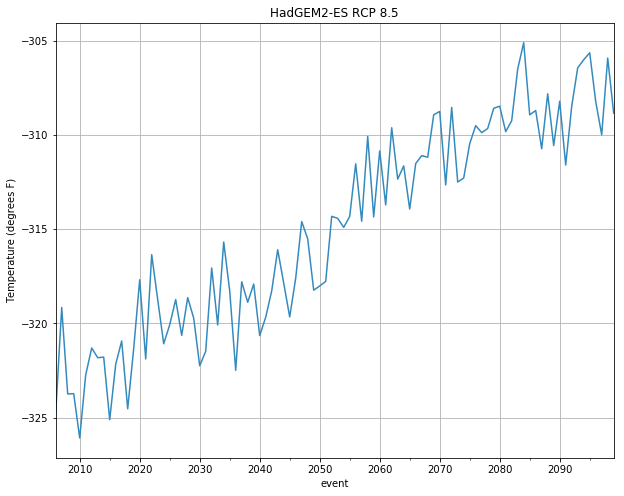

In [15]:
dfT['image'] = dfT['image'].apply(lambda K: (K - 273.15) * 9 / 5 + 32)
dfT['image'].plot(figsize=(10, 8), color='#348ABD')
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Temperature (degrees F)')
plt.grid(True)

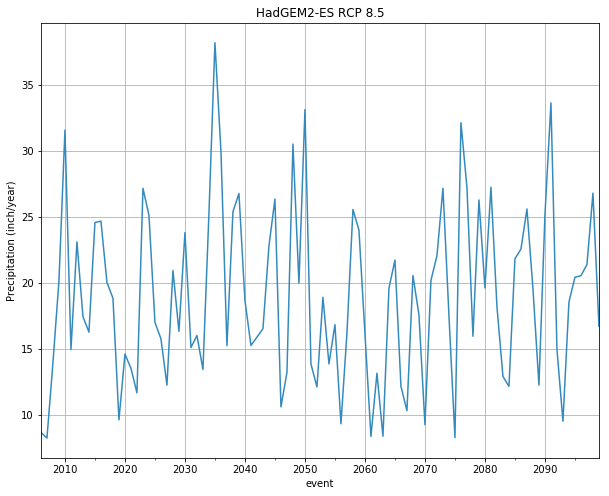

In [13]:
# Precipitation units for models are in kg/m2/s
# convert into inches/day (TODO: update conversion for leap years)
dfP['image'] = dfP['image'].apply(lambda x: x * 86400 * 0.0393701 * 365)
dfP['image'].plot(figsize=(10, 8), color='#348ABD')
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Precipitation (inch/year)')
plt.grid(True)

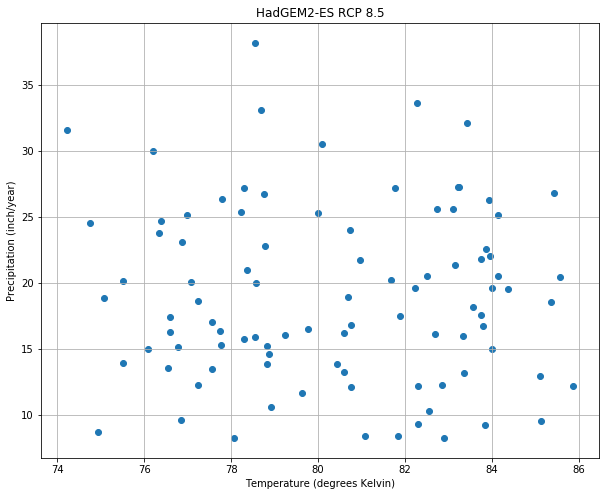

In [14]:
plt.figure(figsize=(10,8)) 
plt.scatter(dfT['image'], dfP['image'])
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Precipitation (inch/year)')
plt.xlabel('Temperature (degrees F)')
plt.grid(True)